
## 🌤️ Solar Radiation Prediction 
---

### 📄 Content

This dataset contains minute-by-minute **meteorological data** collected over a four-month period from the HI-SEAS weather station in Hawaii. The goal is to use weather parameters to **predict solar radiation**, which is essential for various environmental and energy-related applications.

### ✅ Features (Input Variables):

* **Wind Direction (Degrees)**: Direction from which the wind is blowing
* **Wind Speed (mph)**: Speed of wind at the observation time
* **Humidity (%)**: Relative humidity of the atmosphere
* **Temperature (°F)**: Ambient air temperature

### 🎯 Target Variable:

* **Solar Radiation (W/m²)**: The amount of solar energy received per square meter — the key variable to predict

---

### 🔍 Objective:

Build predictive models to estimate solar radiation levels based on atmospheric conditions. This supports a wide range of real-world applications, such as:

* ☀️ Solar energy forecasting
* 🌾 Smart agriculture and irrigation planning
* ⚡ Solar panel performance modeling
* 🌍 Environmental and climate monitoring

---

## 📦 Dataset Overview

This dataset was collected from the **HI-SEAS (Hawaii Space Exploration Analog and Simulation)** weather station during the interval between **Mission IV and Mission V**, spanning from **September to December 2016**.

### 📅 Timeframe & Location:

* **Duration**: September to December 2016
* **Location**: HI-SEAS, Hawaii
* **Timezone**: All timestamps are in **Hawaii Standard Time (HST)**

### 🧾 Dataset Structure:

Each record in the dataset includes:

* **Row**: Row index (used for sorting or identification)
* **UNIXTime**: Timestamp in seconds since Jan 1, 1970
* **Date**: Date in `YYYY-MM-DD` format
* **Time**: Time in `HH:MM:SS` format
* **Radiation**: Solar radiation in **watts per square meter (W/m²)**
* **Temperature**: Ambient temperature in **degrees Fahrenheit (°F)**
* **Pressure**: Barometric pressure in **inches of mercury (inHg)**
* **Humidity**: Relative humidity in **percentage (%)**
* **WindDirection(Degrees)**: Wind direction in **degrees**
* **Speed**: Wind speed in **miles per hour (mph)**
* **TimeSunRise**: Sunrise time (HST)
* **TimeSunSet**: Sunset time (HST)

---




#### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
# load dataset using pandas library
df = pd.read_csv('Solar_Radiation.csv')
df

UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.46        59                  177.39   5.62    06:13:00   
1         30.46        58                  176.78   3.37    06:13:00   
2         30.46        57                  158.75   3.37    06:13:00   
3         30.46        60                  137.71   3.37    06:13:00   
4         30.46        62                  104.95   5.62    06:13:00   
...         ...       ...                     ...    ...         ...   
32681     30.43       102                  145.42   6.75    06:41:00   
32682     30.42       102                  117.78   6.75    06:41:00   
32683     30.42       102                  145.19   9.00    06:41:00   
32684     30.42       101                  164.19   7.87    06:41:00   
32685     30.43       101                   83.59   3.37    06:41:00   

      TimeSunSet  
0       18:13:00  
1       18:13:00  
2       18:13:00  
3       18:13:00  
4       18:13:00  
...          ...  
32681   17:42:00  
32682   17:42:00  
32683   17:42:00  
32684   17:42:00  
32685   17:42:00  

[32686 rows x 11 columns]

In [3]:
# Top 5 records of dataframe
df.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

### **Data Exploration**

In [4]:
# check all information provided in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
# basic statistic of dataset
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

In [6]:
# checking null or missing values in dataframe
df.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [7]:
# check the columns present in dataframe
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [8]:
# check the shape of the dataframe
row, col = df.shape
print(f'Dataframe contain {row} rows and {col} columns.')

Dataframe contain 32686 rows and 11 columns.



---

1. ✅ **No Missing Values**
   The dataset is **well-cleaned** and contains **no null or missing values**, making it ready for analysis and modeling without requiring imputation or removal of incomplete rows.

2. 📊 **Dataset Dimensions**
   It consists of **32,686 rows** and **11 columns**, providing a rich and sufficiently large dataset for training robust machine learning models.

3. ⚠️ **Data Type Corrections Required**
   Some columns have **inappropriate data types** that need correction before proceeding with EDA, visualization, or model training:

   * `'Date'`, `'Time'` → should be converted to proper **datetime** objects
   * `'TimeSunRise'`, `'TimeSunSet'` → should be parsed into **time** format for meaningful comparisons or time-based feature engineering

---


### **Data Preprocessing**


In [9]:
# Extract Date from Date/Time column (Data) present in dataframe
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [10]:
# check the dataframe
df.head()

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0  1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1  1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2  1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3  1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4  1475228124  9/29/2016  23:35:24       1.17           48     30.46   

   Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0        59                  177.39   5.62    06:13:00   18:13:00  
1        58                  176.78   3.37    06:13:00   18:13:00  
2        57                  158.75   3.37    06:13:00   18:13:00  
3        60                  137.71   3.37    06:13:00   18:13:00  
4        62                  104.95   5.62    06:13:00   18:13:00

In [11]:
# Extract Date and Month from 'Data' column and Hour, Minute and Second from 'Time' column. 
# Note: Year is not required because year is same '2016' for all records.

df['Month'] =pd.to_datetime(df['Data']).dt.month
df['Day'] =pd.to_datetime(df['Data']).dt.day
df['Hour'] =pd.to_datetime(df['Time']).dt.hour
df['Minute'] =pd.to_datetime(df['Time']).dt.minute
df['Second'] =pd.to_datetime(df['Time']).dt.second
df

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0      1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1      1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2      1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3      1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4      1475228124  9/29/2016  23:35:24       1.17           48     30.46   
...           ...        ...       ...        ...          ...       ...   
32681  1480587604  12/1/2016  00:20:04       1.22           44     30.43   
32682  1480587301  12/1/2016  00:15:01       1.17           44     30.42   
32683  1480587001  12/1/2016  00:10:01       1.20           44     30.42   
32684  1480586702  12/1/2016  00:05:02       1.23           44     30.42   
32685  1480586402  12/1/2016  00:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  Month  \
0            59                  177.39   5.62    06:13:00   18:13:00      9   
1            58                  176.78   3.37    06:13:00   18:13:00      9   
2            57                  158.75   3.37    06:13:00   18:13:00      9   
3            60                  137.71   3.37    06:13:00   18:13:00      9   
4            62                  104.95   5.62    06:13:00   18:13:00      9   
...         ...                     ...    ...         ...        ...    ...   
32681       102                  145.42   6.75    06:41:00   17:42:00     12   
32682       102                  117.78   6.75    06:41:00   17:42:00     12   
32683       102                  145.19   9.00    06:41:00   17:42:00     12   
32684       101                  164.19   7.87    06:41:00   17:42:00     12   
32685       101                   83.59   3.37    06:41:00   17:42:00     12   

       Day  Hour  Minute  Second  
0       29    23      55      26  
1       29    23      50      23  
2       29    23      45      26  
3       29    23      40      21  
4       29    23      35      24  
...    ...   ...     ...     ...  
32681    1     0      20       4  
32682    1     0      15       1  
32683    1     0      10       1  
32684    1     0       5       2  
32685    1     0       0       2  

[32686 rows x 16 columns]

In [12]:
# check some time-series visualization before droping the irrelevant columns
df['Data'] = pd.to_datetime(df['Data'])

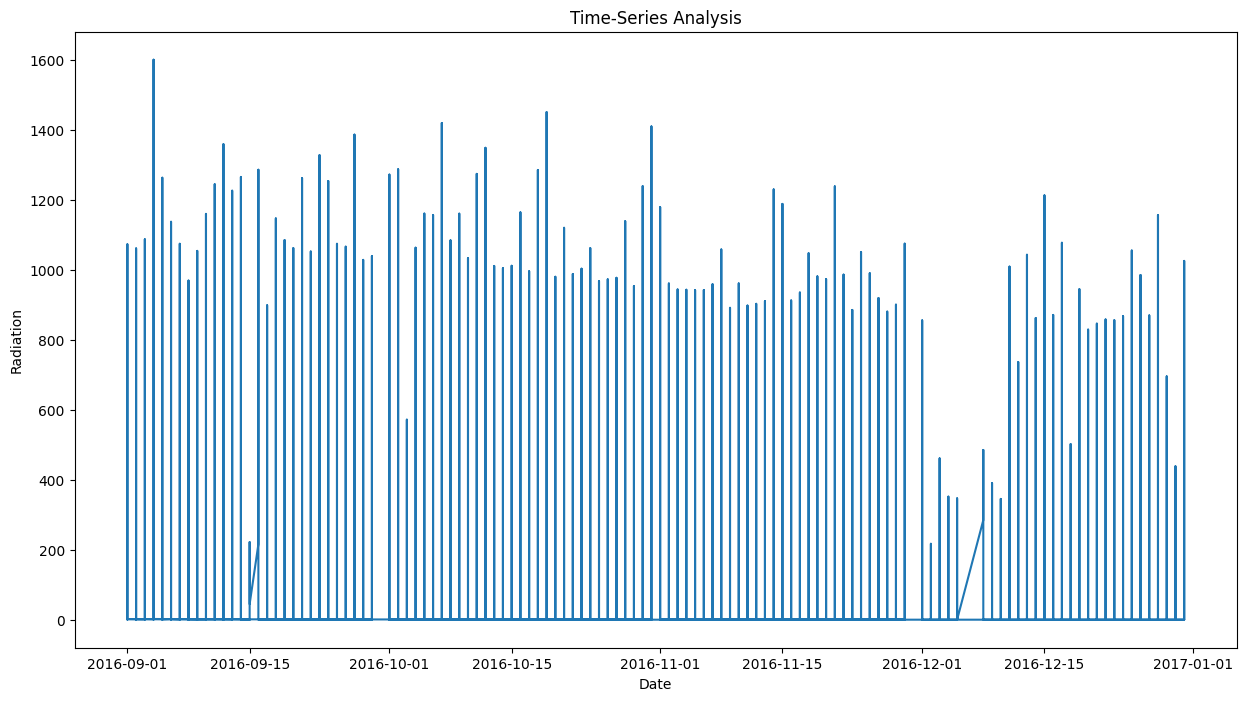

In [13]:
# time-series analysis using 'Data' vs 'Radiation' column
plt.figure(figsize=(15,8))
plt.plot(df['Data'],df['Radiation'])
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.title('Time-Series Analysis')
plt.show()

In [14]:
# Extract Hour and Minute from 'TimeSunRise' column
df['RiseHour'] = pd.to_datetime(df['TimeSunRise']).dt.hour
df['RiseMinute'] = pd.to_datetime(df['TimeSunRise']).dt.minute

# Extract Hour and Minute from 'TimeSunSet' column
df['SetHour'] = pd.to_datetime(df['TimeSunSet']).dt.hour
df['SetMinute'] = pd.to_datetime(df['TimeSunSet']).dt.minute

df

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0      1475229326 2016-09-29  23:55:26       1.21           48     30.46   
1      1475229023 2016-09-29  23:50:23       1.21           48     30.46   
2      1475228726 2016-09-29  23:45:26       1.23           48     30.46   
3      1475228421 2016-09-29  23:40:21       1.21           48     30.46   
4      1475228124 2016-09-29  23:35:24       1.17           48     30.46   
...           ...        ...       ...        ...          ...       ...   
32681  1480587604 2016-12-01  00:20:04       1.22           44     30.43   
32682  1480587301 2016-12-01  00:15:01       1.17           44     30.42   
32683  1480587001 2016-12-01  00:10:01       1.20           44     30.42   
32684  1480586702 2016-12-01  00:05:02       1.23           44     30.42   
32685  1480586402 2016-12-01  00:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  Month  \
0            59                  177.39   5.62    06:13:00   18:13:00      9   
1            58                  176.78   3.37    06:13:00   18:13:00      9   
2            57                  158.75   3.37    06:13:00   18:13:00      9   
3            60                  137.71   3.37    06:13:00   18:13:00      9   
4            62                  104.95   5.62    06:13:00   18:13:00      9   
...         ...                     ...    ...         ...        ...    ...   
32681       102                  145.42   6.75    06:41:00   17:42:00     12   
32682       102                  117.78   6.75    06:41:00   17:42:00     12   
32683       102                  145.19   9.00    06:41:00   17:42:00     12   
32684       101                  164.19   7.87    06:41:00   17:42:00     12   
32685       101                   83.59   3.37    06:41:00   17:42:00     12   

       Day  Hour  Minute  Second  RiseHour  RiseMinute  SetHour  SetMinute  
0       29    23      55      26         6          13       18         13  
1       29    23      50      23         6          13       18         13  
2       29    23      45      26         6          13       18         13  
3       29    23      40      21         6          13       18         13  
4       29    23      35      24         6          13       18         13  
...    ...   ...     ...     ...       ...         ...      ...        ...  
32681    1     0      20       4         6          41       17         42  
32682    1     0      15       1         6          41       17         42  
32683    1     0      10       1         6          41       17         42  
32684    1     0       5       2         6          41       17         42  
32685    1     0       0       2         6          41       17         42  

[32686 rows x 20 columns]

In [15]:
# Now, we extract all the dates, months, time etc. It's time to drop the unnecessary columns from the dataset
df = df.drop(['UNIXTime','Data','Time','TimeSunSet','TimeSunRise'],axis=1)
df     

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0           1.21           48     30.46        59                  177.39   
1           1.21           48     30.46        58                  176.78   
2           1.23           48     30.46        57                  158.75   
3           1.21           48     30.46        60                  137.71   
4           1.17           48     30.46        62                  104.95   
...          ...          ...       ...       ...                     ...   
32681       1.22           44     30.43       102                  145.42   
32682       1.17           44     30.42       102                  117.78   
32683       1.20           44     30.42       102                  145.19   
32684       1.23           44     30.42       101                  164.19   
32685       1.20           44     30.43       101                   83.59   

       Speed  Month  Day  Hour  Minute  Second  RiseHour  RiseMinute  SetHour  \
0       5.62      9   29    23      55      26         6          13       18   
1       3.37      9   29    23      50      23         6          13       18   
2       3.37      9   29    23      45      26         6          13       18   
3       3.37      9   29    23      40      21         6          13       18   
4       5.62      9   29    23      35      24         6          13       18   
...      ...    ...  ...   ...     ...     ...       ...         ...      ...   
32681   6.75     12    1     0      20       4         6          41       17   
32682   6.75     12    1     0      15       1         6          41       17   
32683   9.00     12    1     0      10       1         6          41       17   
32684   7.87     12    1     0       5       2         6          41       17   
32685   3.37     12    1     0       0       2         6          41       17   

       SetMinute  
0             13  
1             13  
2             13  
3             13  
4             13  
...          ...  
32681         42  
32682         42  
32683         42  
32684         42  
32685         42  

[32686 rows x 15 columns]

### **Data Visualization**

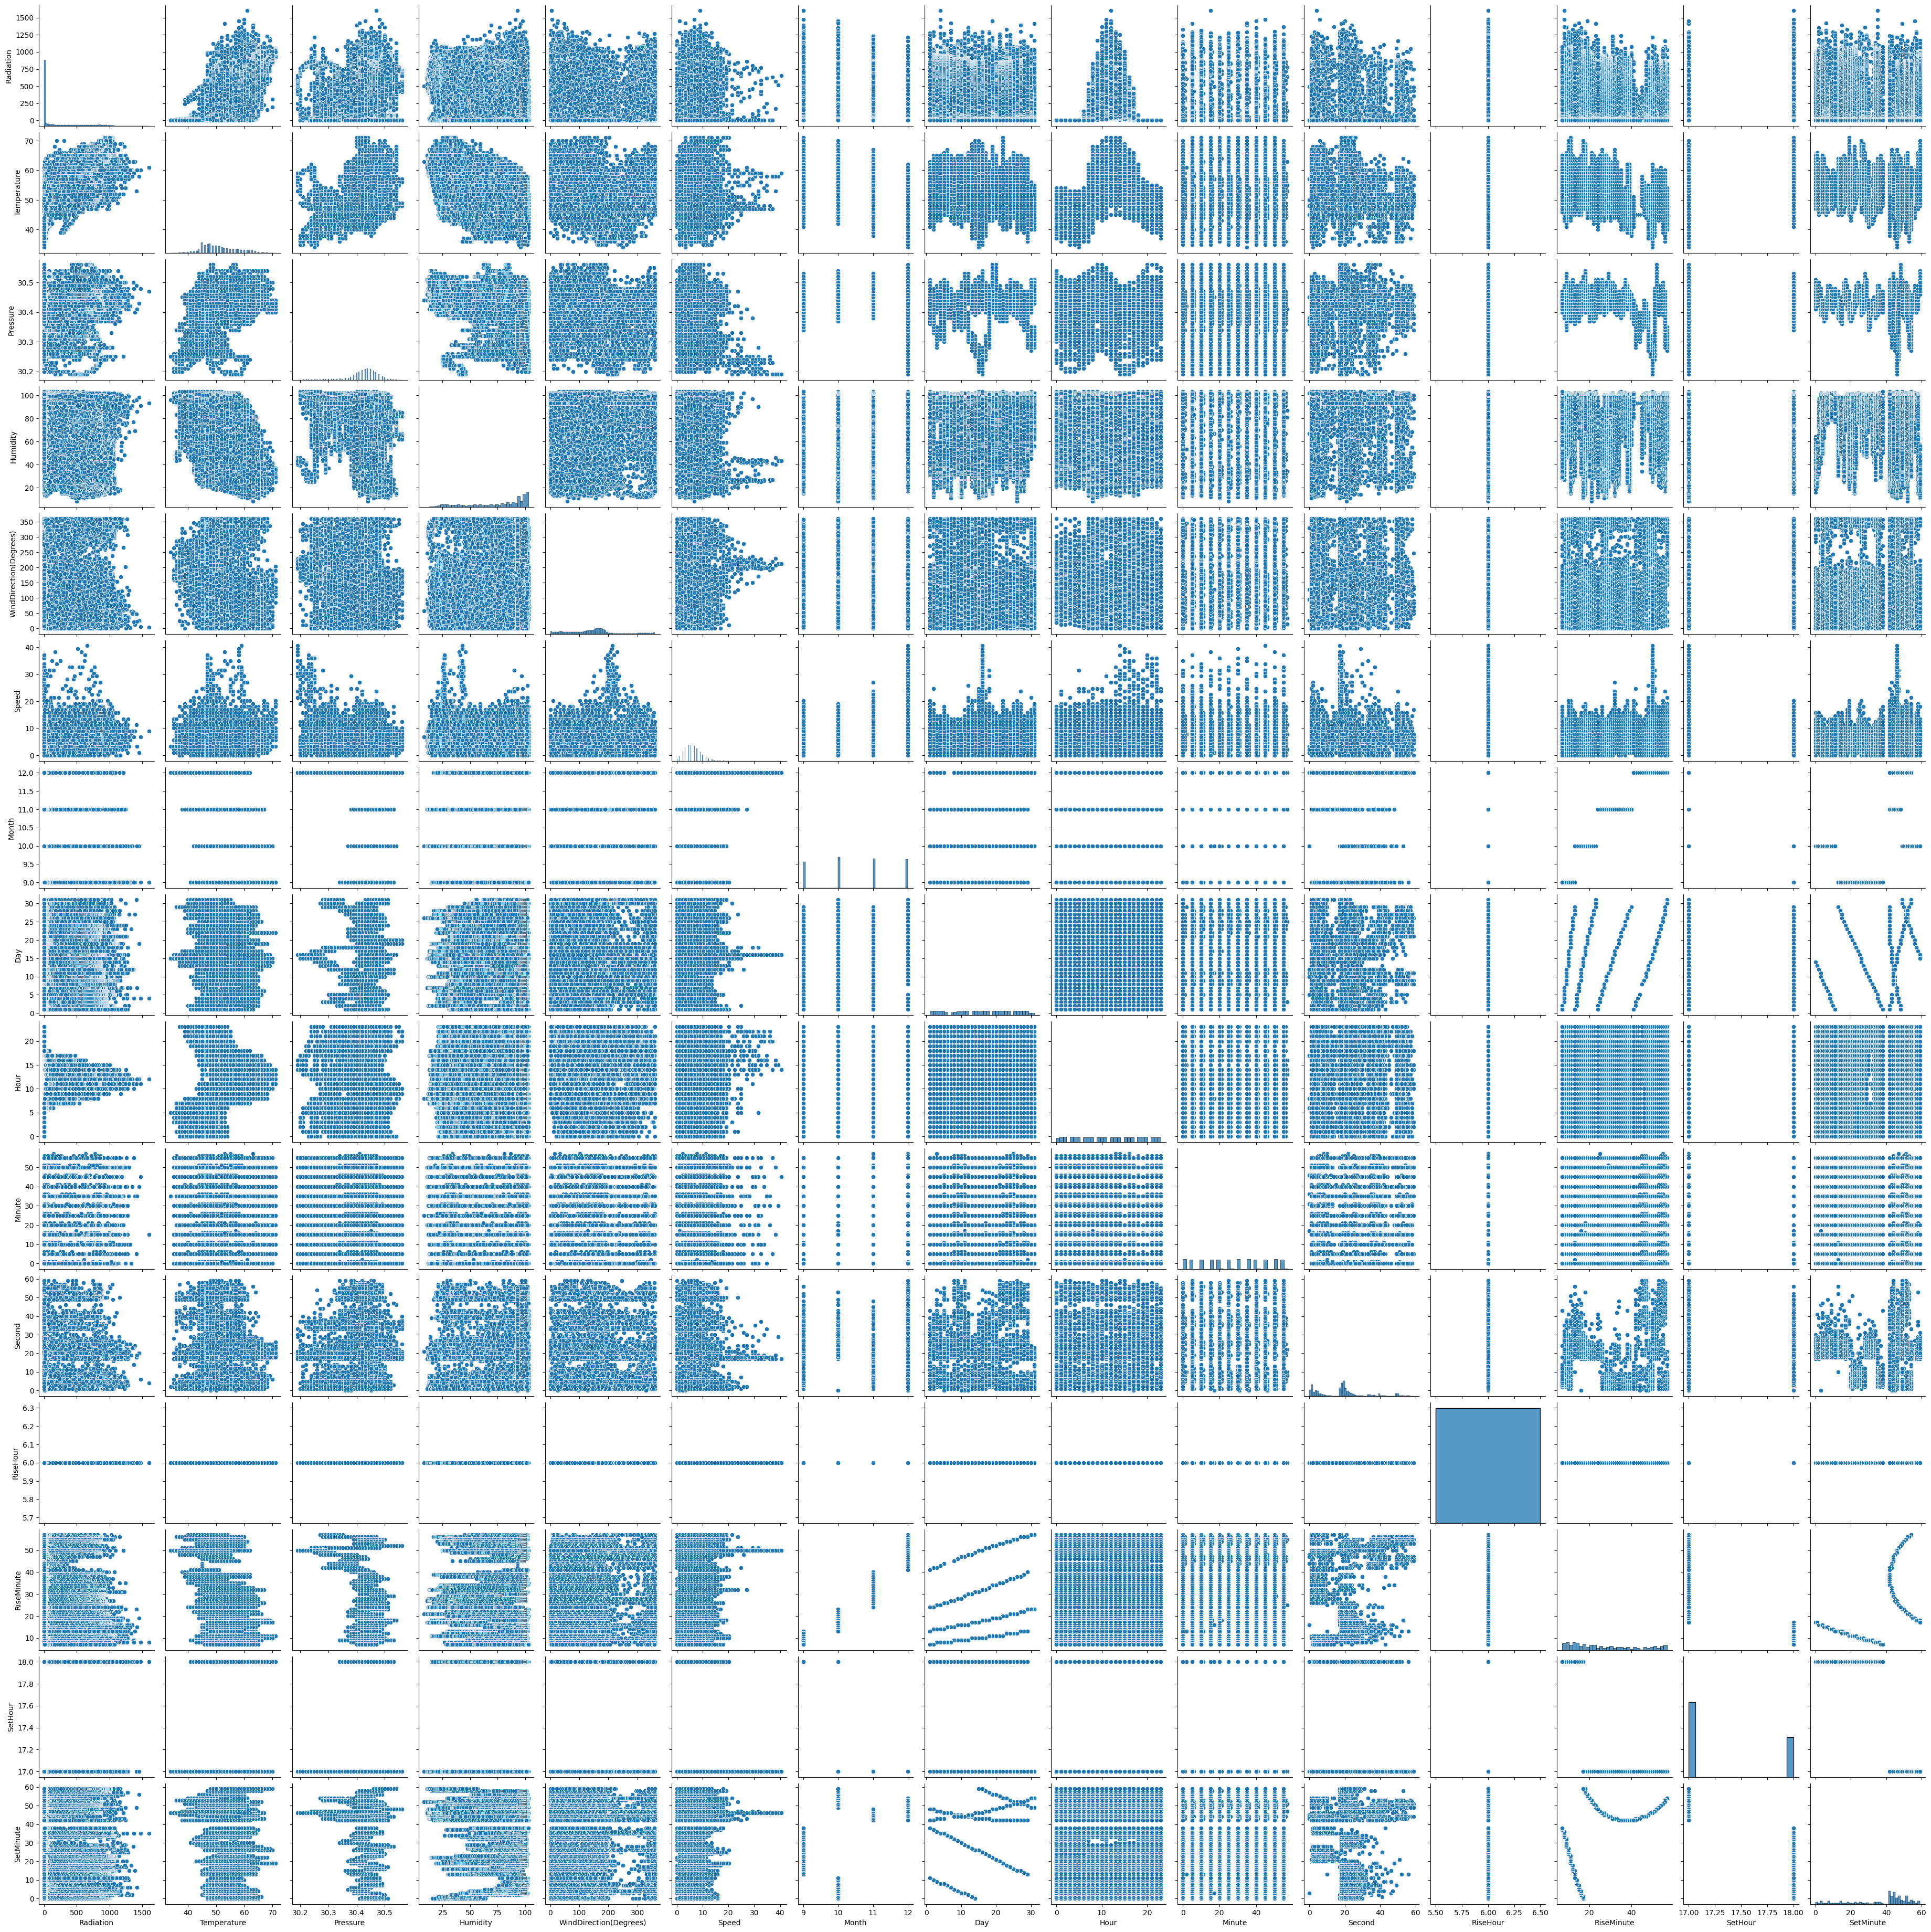

In [16]:
# performing pair plot to understand the data quickly
sns.pairplot(df)

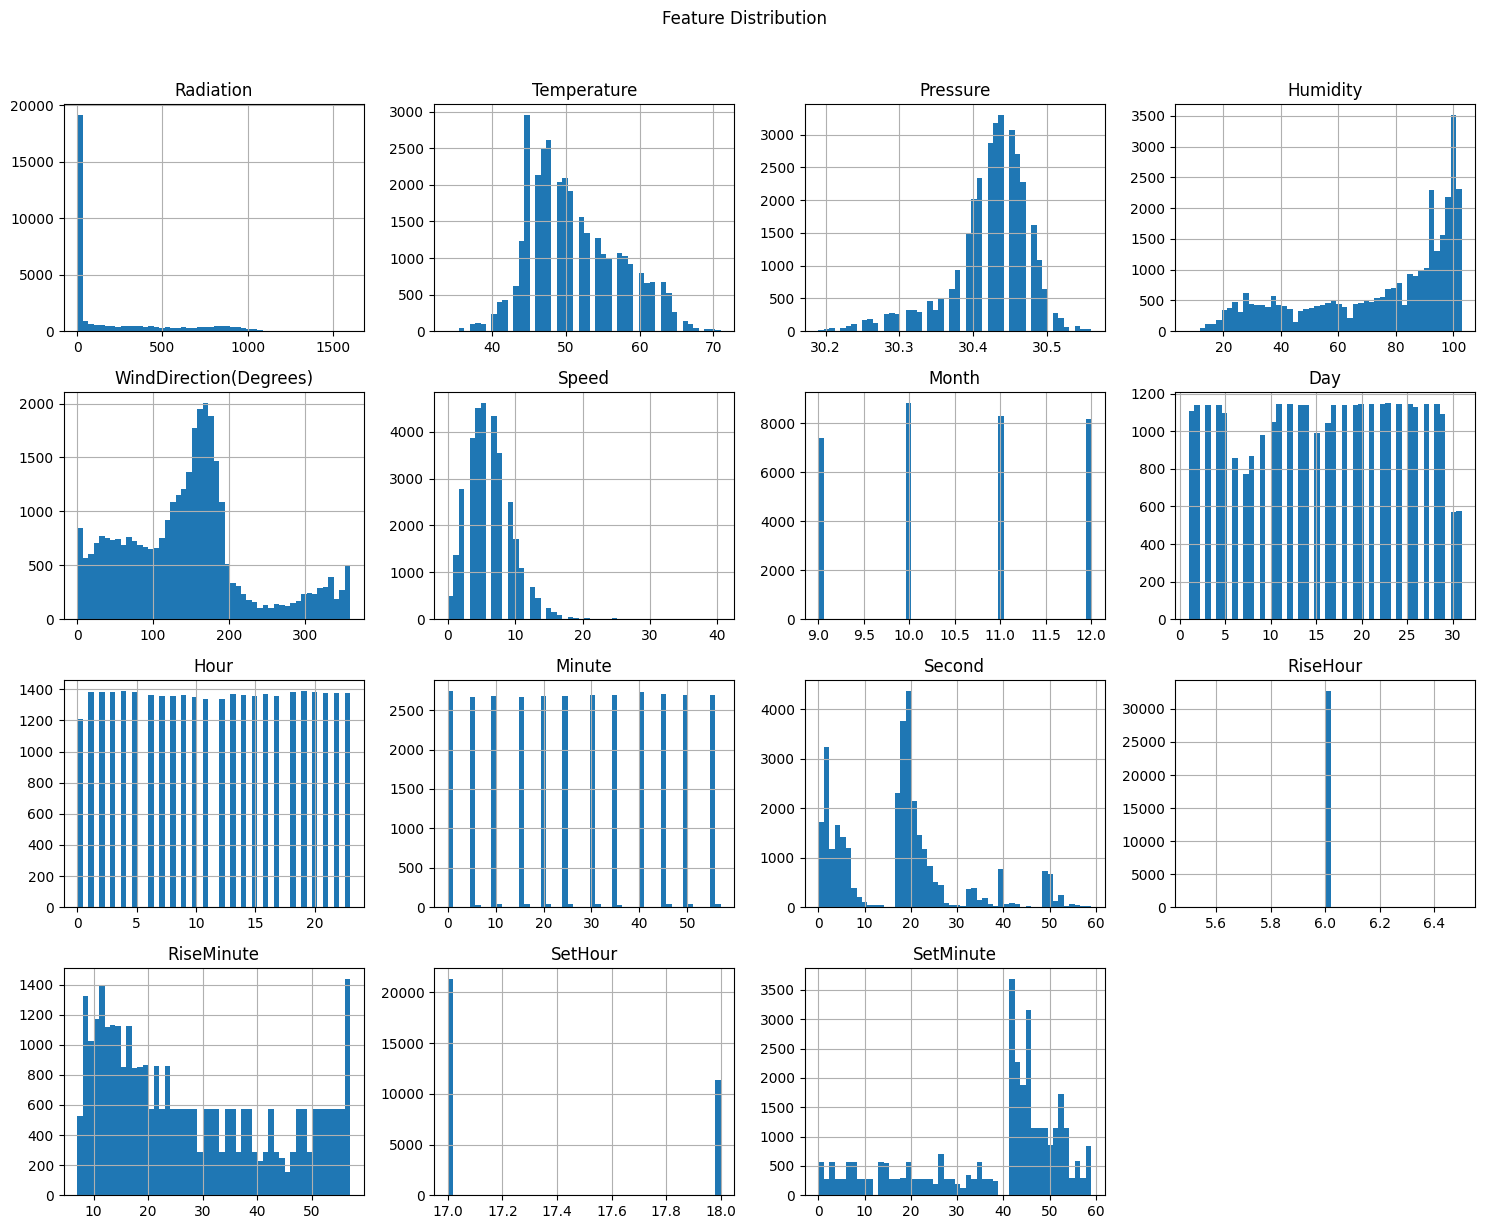

In [17]:
# feature distribution of the dataset

# plot all features present in the dataset
df.hist(bins=50,figsize=(15,12))

# add title with size and position
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

# maintain perfect gaps between all plots
plt.tight_layout()

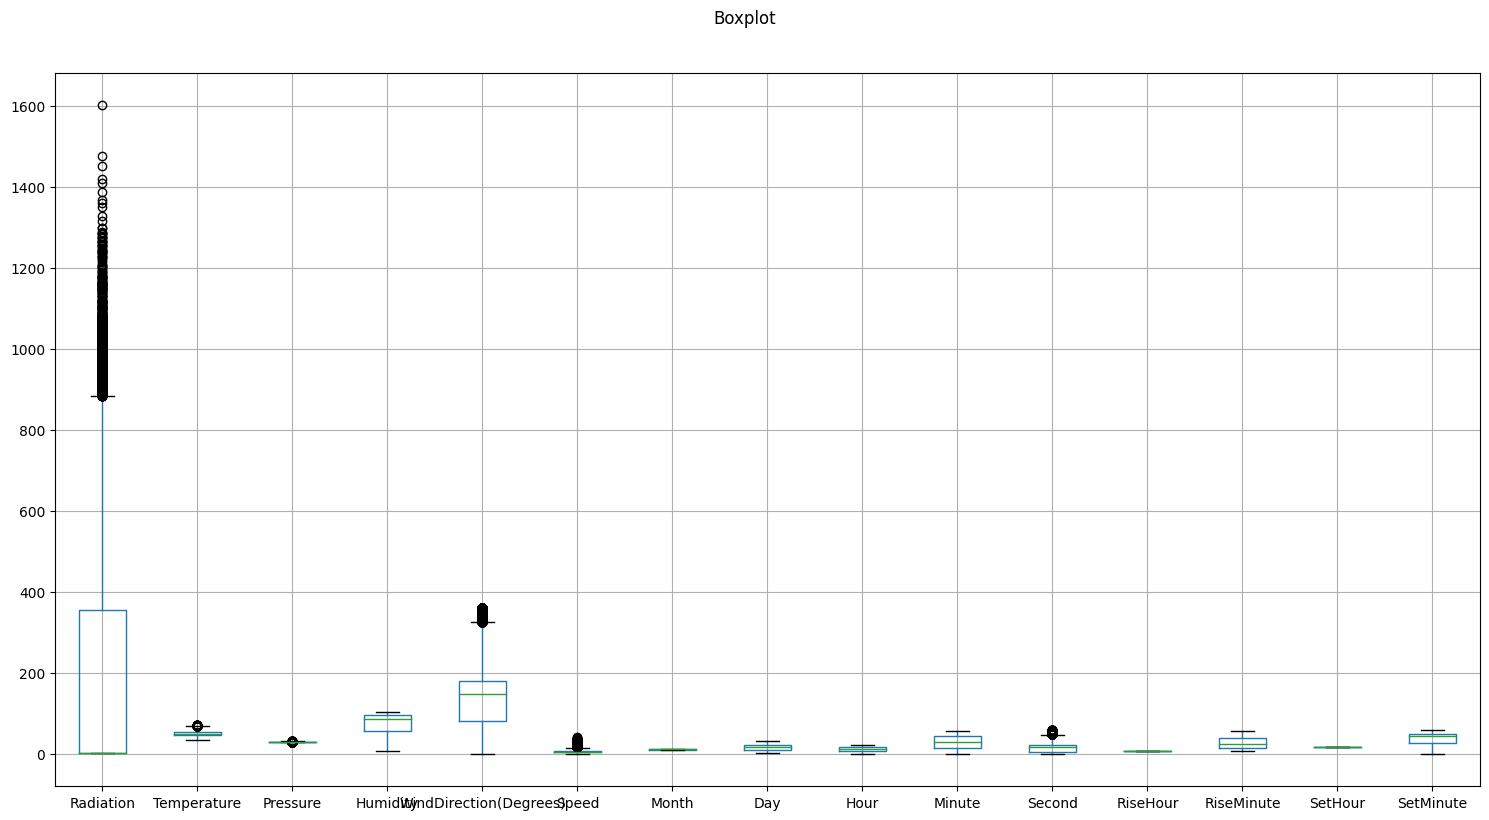

In [18]:
# boxplot of all the features

df.boxplot(figsize=(15,8))

plt.suptitle('Boxplot',x=0.5,y=1.02,ha='center',fontsize='large')

plt.tight_layout()

### 📦 Outlier Detection
Based on the boxplot visualizations, we can conclude that the following columns contain outliers:

- Radiation

- Temperature

- Pressure

- Wind Direction

- Speed

These outliers may affect the performance and accuracy of machine learning models, especially those sensitive to data distribution (e.g., linear regression, KNN). We will address and handle these outliers during the data preprocessing phase to ensure model robustness and improved performance.

___

### 📈 Relationship Analysis

According to the dataset characteristics, the **`Radiation`** column is believed to have an **interdependent relationship** with both **`Humidity`** and **`Temperature`**. To visually explore these potential correlations, we will use **scatter plots** to analyze the nature and strength of these relationships.

This will help us understand how solar radiation varies with atmospheric conditions and whether these features serve as strong predictors for our machine learning models.

---



### Humidity vs Radiation

Text(0.5, 1.0, 'Realtion between Humidity and Radiation')

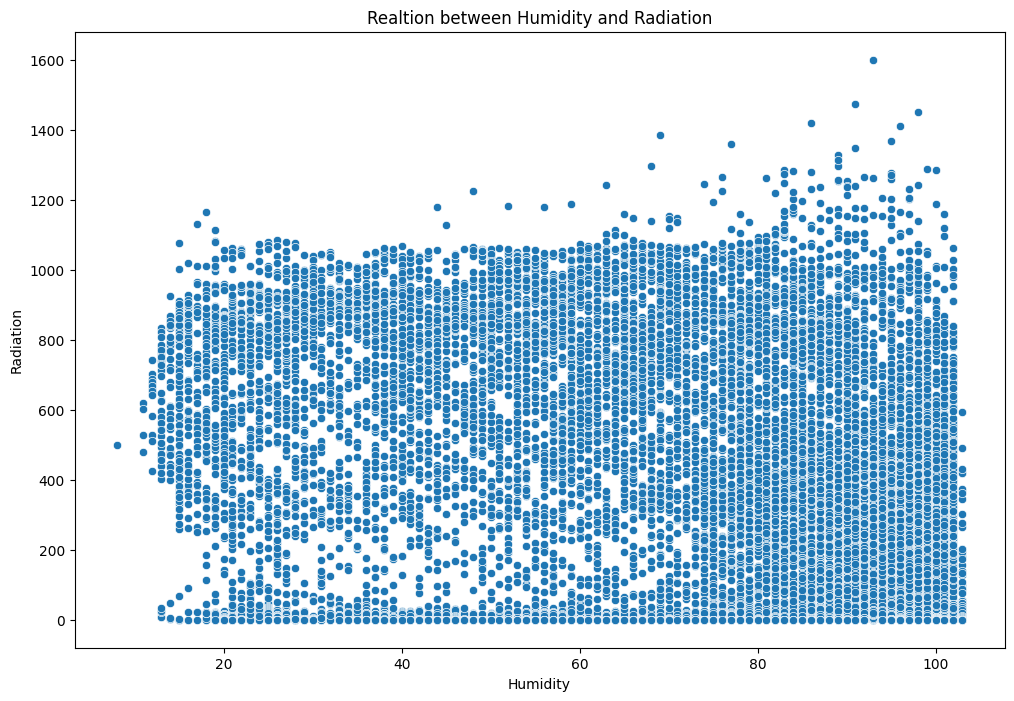

In [19]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df,x='Humidity',y='Radiation')

plt.title('Realtion between Humidity and Radiation')

From the above scatter plot, we observe a noticeable pattern between Humidity and Radiation, suggesting a strong non-linear relationship. As humidity increases, the distribution of solar radiation appears to change significantly, indicating that humidity could be an important predictor in our radiation prediction model.

___


### Temperature vs Radiation

Text(0.5, 1.0, 'Realtion between Temperature and Radiation')

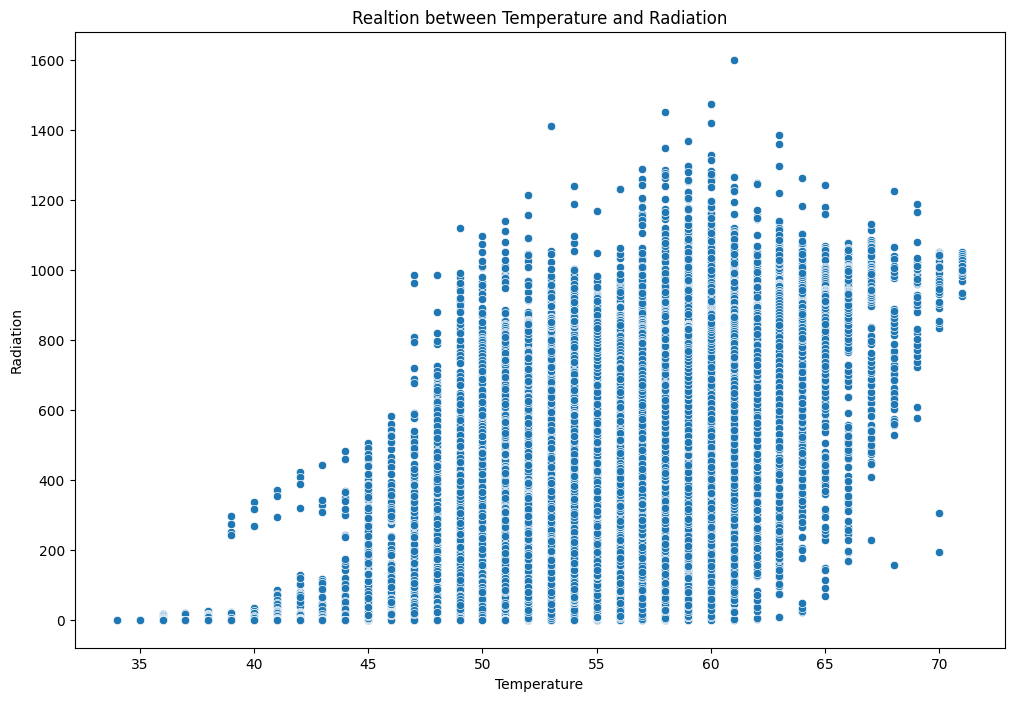

In [20]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df,x='Temperature',y='Radiation')

plt.title('Realtion between Temperature and Radiation')

From the scatter plot above, we can see a clear upward trend — as temperature increases, solar radiation also increases. This shows that there is a strong relationship between temperature and radiation.

However, after a certain temperature point, the radiation levels start to spread out and don’t increase as steadily. This means that while higher temperatures generally bring more radiation, it’s not always consistent at very high temperatures.

So, we can say that temperature is an important factor in predicting solar radiation.

___


### **Coorelation Matrix and Heatmap**

In [21]:
df.corr()

Radiation  Temperature  Pressure  Humidity  \
Radiation                1.000000     0.734955  0.119016 -0.226171   
Temperature              0.734955     1.000000  0.311173 -0.285055   
Pressure                 0.119016     0.311173  1.000000 -0.223973   
Humidity                -0.226171    -0.285055 -0.223973  1.000000   
WindDirection(Degrees)  -0.230324    -0.259421 -0.229010 -0.001833   
Speed                    0.073627    -0.031458 -0.083639 -0.211624   
Month                   -0.095450    -0.354560 -0.341759 -0.068854   
Day                      0.039978    -0.123705 -0.024633  0.014637   
Hour                     0.004398     0.197464  0.091069  0.077899   
Minute                  -0.000730    -0.001934  0.001860  0.000499   
Second                  -0.031270    -0.036147 -0.031102 -0.027682   
RiseHour                      NaN          NaN       NaN       NaN   
RiseMinute              -0.092850    -0.380968 -0.380399 -0.023955   
SetHour                  0.048719     0.300920  0.151939  0.145143   
SetMinute               -0.039816    -0.242881 -0.119599 -0.119526   

                        WindDirection(Degrees)     Speed     Month       Day  \
Radiation                            -0.230324  0.073627 -0.095450  0.039978   
Temperature                          -0.259421 -0.031458 -0.354560 -0.123705   
Pressure                             -0.229010 -0.083639 -0.341759 -0.024633   
Humidity                             -0.001833 -0.211624 -0.068854  0.014637   
WindDirection(Degrees)                1.000000  0.073092  0.181485 -0.082354   
Speed                                 0.073092  1.000000  0.150822  0.117337   
Month                                 0.181485  0.150822  1.000000  0.038027   
Day                                  -0.082354  0.117337  0.038027  1.000000   
Hour                                 -0.077969 -0.057939 -0.005396 -0.008010   
Minute                               -0.000602  0.000192  0.000168 -0.000196   
Second                               -0.032568 -0.032934  0.220563  0.089078   
RiseHour                                   NaN       NaN       NaN       NaN   
RiseMinute                            0.176929  0.167075  0.952472  0.274522   
SetHour                              -0.078540 -0.159384 -0.784783 -0.263575   
SetMinute                             0.070030  0.119926  0.541883  0.265662   

                            Hour    Minute    Second  RiseHour  RiseMinute  \
Radiation               0.004398 -0.000730 -0.031270       NaN   -0.092850   
Temperature             0.197464 -0.001934 -0.036147       NaN   -0.380968   
Pressure                0.091069  0.001860 -0.031102       NaN   -0.380399   
Humidity                0.077899  0.000499 -0.027682       NaN   -0.023955   
WindDirection(Degrees) -0.077969 -0.000602 -0.032568       NaN    0.176929   
Speed                  -0.057939  0.000192 -0.032934       NaN    0.167075   
Month                  -0.005396  0.000168  0.220563       NaN    0.952472   
Day                    -0.008010 -0.000196  0.089078       NaN    0.274522   
Hour                    1.000000 -0.004052  0.004199       NaN   -0.006772   
Minute                 -0.004052  1.000000  0.002517       NaN   -0.000158   
Second                  0.004199  0.002517  1.000000       NaN    0.258917   
RiseHour                     NaN       NaN       NaN       NaN         NaN   
RiseMinute             -0.006772 -0.000158  0.258917       NaN    1.000000   
SetHour                 0.008629  0.001052 -0.037743       NaN   -0.742329   
SetMinute              -0.007056 -0.002215  0.003571       NaN    0.562851   

                         SetHour  SetMinute  
Radiation               0.048719  -0.039816  
Temperature             0.300920  -0.242881  
Pressure                0.151939  -0.119599  
Humidity                0.145143  -0.119526  
WindDirection(Degrees) -0.078540   0.070030  
Speed                  -0.159384   0.119926  
Month                  -0.784783   0.541883  
Day  

Text(0.5, 1.0, 'Cooreation Matrix of Dataframe')

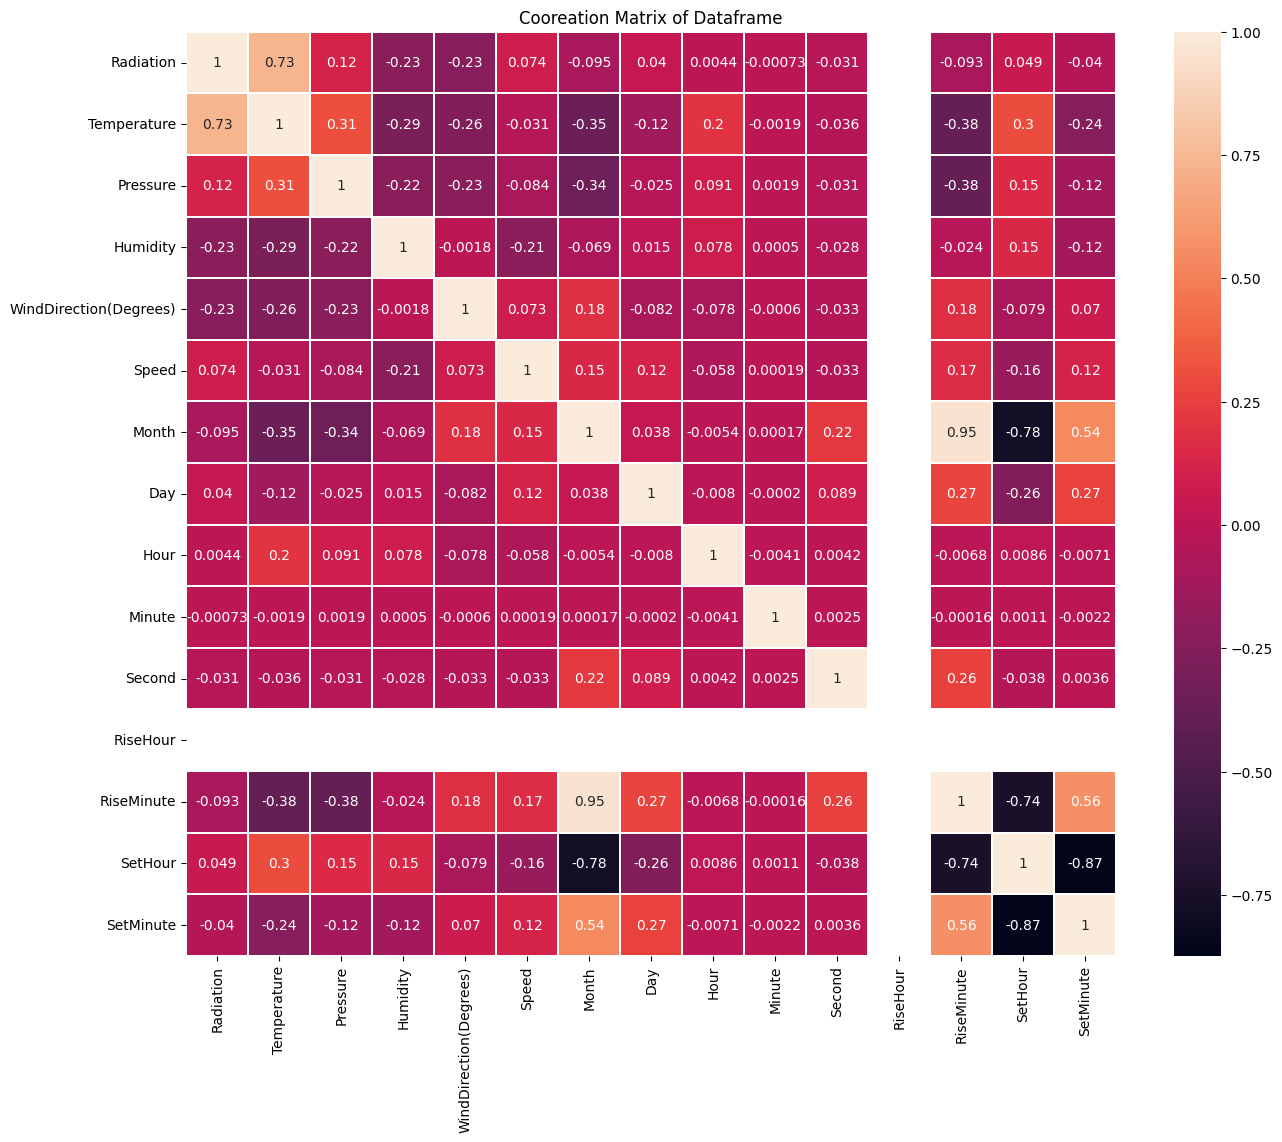

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Cooreation Matrix of Dataframe')

The 'RiseHour' column contains only one unique value (which is 6) for all the rows in the dataset. Since there's no variation in this column, its standard deviation is zero.

As a result, when we try to calculate the correlation between 'RiseHour' and other variables, the result is NaN (Not a Number) because correlation cannot be computed when there’s no change in the values.

So, this column does not provide any useful information for analysis or modeling and can be safely removed.
___

In [23]:
df.drop(['RiseHour'],axis=1,inplace=True)
df

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0           1.21           48     30.46        59                  177.39   
1           1.21           48     30.46        58                  176.78   
2           1.23           48     30.46        57                  158.75   
3           1.21           48     30.46        60                  137.71   
4           1.17           48     30.46        62                  104.95   
...          ...          ...       ...       ...                     ...   
32681       1.22           44     30.43       102                  145.42   
32682       1.17           44     30.42       102                  117.78   
32683       1.20           44     30.42       102                  145.19   
32684       1.23           44     30.42       101                  164.19   
32685       1.20           44     30.43       101                   83.59   

       Speed  Month  Day  Hour  Minute  Second  RiseMinute  SetHour  SetMinute  
0       5.62      9   29    23      55      26          13       18         13  
1       3.37      9   29    23      50      23          13       18         13  
2       3.37      9   29    23      45      26          13       18         13  
3       3.37      9   29    23      40      21          13       18         13  
4       5.62      9   29    23      35      24          13       18         13  
...      ...    ...  ...   ...     ...     ...         ...      ...        ...  
32681   6.75     12    1     0      20       4          41       17         42  
32682   6.75     12    1     0      15       1          41       17         42  
32683   9.00     12    1     0      10       1          41       17         42  
32684   7.87     12    1     0       5       2          41       17         42  
32685   3.37     12    1     0       0       2          41       17         42  

[32686 rows x 14 columns]

Text(0.5, 1.0, 'Correlation Plot of All Features')

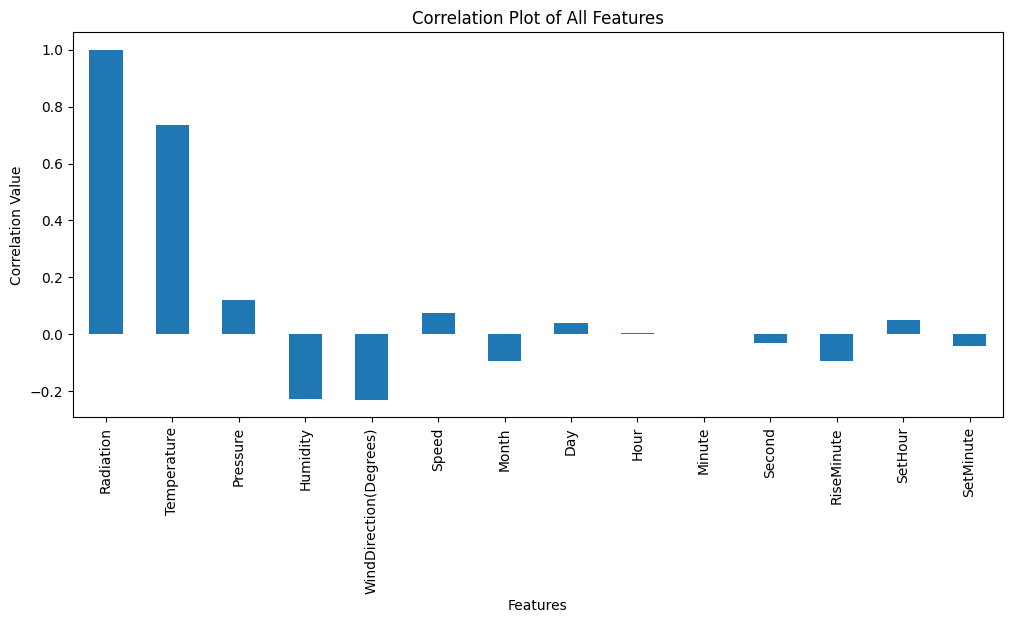

In [24]:
# checking all the features correlation with respect to target variable

plt.figure(figsize=(12,5))

df.corr()['Radiation'][0:].plot(kind='bar')

plt.xlabel('Features')

plt.ylabel('Correlation Value')

# create a title for the plot
plt.title('Correlation Plot of All Features')

### Correlation Insights

We can observe that:

- Temperature shows a strong positive correlation with Radiation — meaning, as temperature increases, radiation tends to increase.

- On the other hand, both Humidity and Wind Direction show a negative correlation with Radiation — meaning, higher humidity or wind direction values are generally associated with lower radiation levels.

Text(0.5, 1.0, 'Lineplot of Temperature vs Radiation')

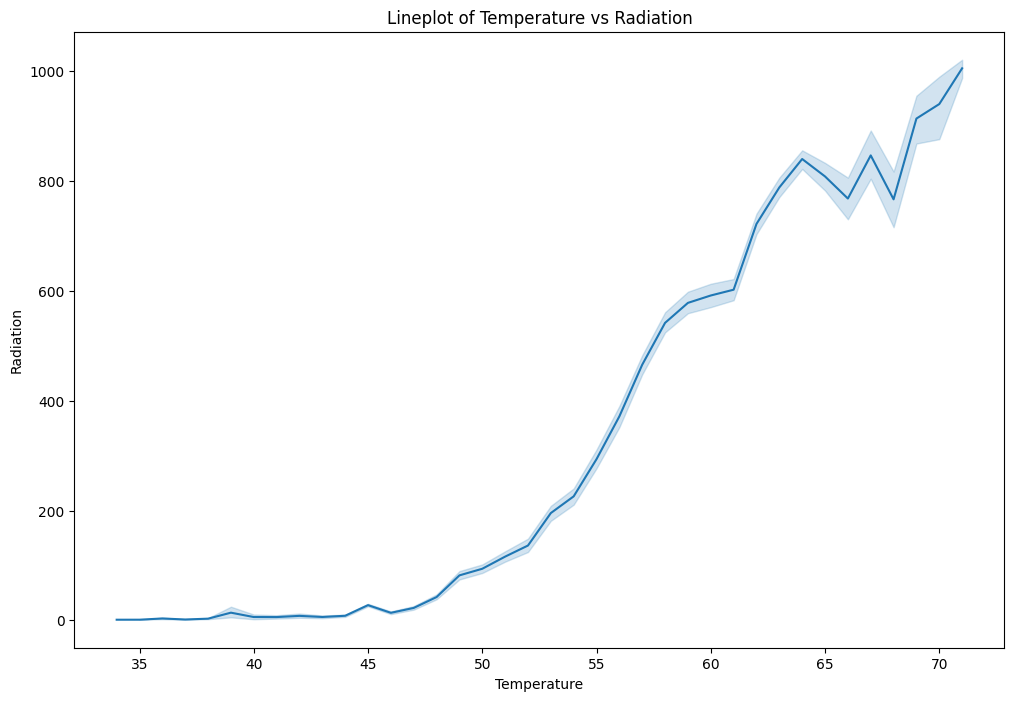

In [25]:
# check the relation between Temperature and Radiation using lineplot
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='Temperature',y='Radiation')
plt.title('Lineplot of Temperature vs Radiation')

([<matplotlib.patches.Wedge at 0x24aa1484340>,
 [Text(0.7277776264326676, 0.8248270888277328, 'October'),
  Text(-0.8758700824118629, 0.6654709600995649, 'November'),
  Text(-0.656597957437388, -0.8825412864501299, 'December'),
  Text(0.8321296791994461, -0.7194165670843473, 'September')],
 [Text(0.39696961441781864, 0.449905684815127, '27%'),
  Text(-0.4777473176791979, 0.36298416005430806, '25%'),
  Text(-0.3581443404203934, -0.48138615624552533, '25%'),
  Text(0.45388891592697056, -0.39240903659146215, '23%')])

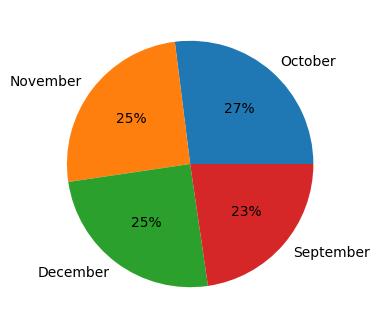

In [26]:
# Let's check the distribution in Month column using pie chart

# list for the Month column
months = ['October','November','December','September']

# make an object which store value count of the elements in Month column
months_data = pd.Series(df['Month']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,4))

# ploting pie chart
plt.pie(months_data,labels=months,autopct='%.0f%%')

The data is fairly evenly distributed across all four months — September, October, November, and December.
This balanced distribution ensures that the model won't be biased toward any particular month during training.
___

### Outlier Removal 

In [27]:
# checking the outliers in dataframe
def detect_Outliers(df):

    for feature in df.drop("Radiation", axis=1).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature]

        print(feature, outliers.shape[0])

detect_Outliers(df)

Temperature 89
Pressure 1662
Humidity 0
WindDirection(Degrees) 1618
Speed 479
Month 0
Day 0
Hour 0
Minute 0
Second 1953
RiseMinute 0
SetHour 0
SetMinute 0


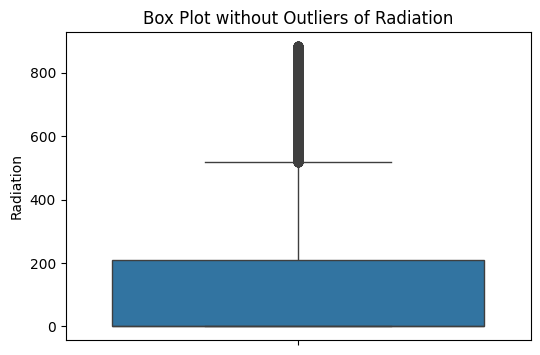

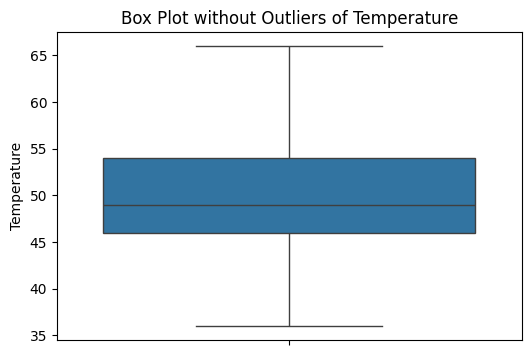

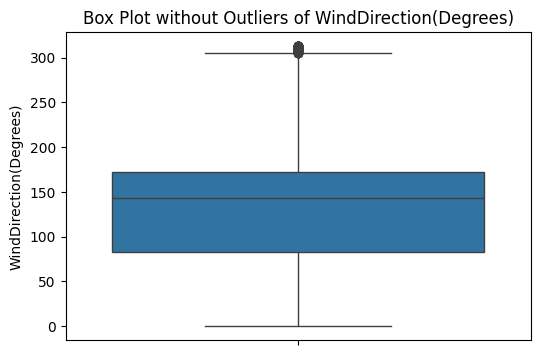

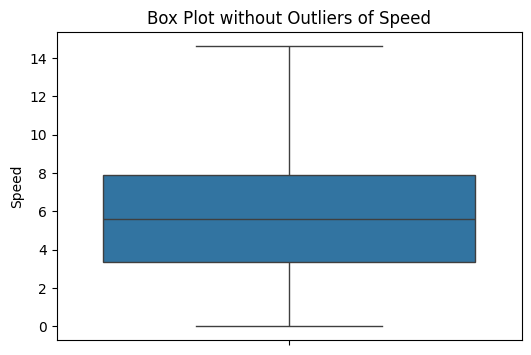

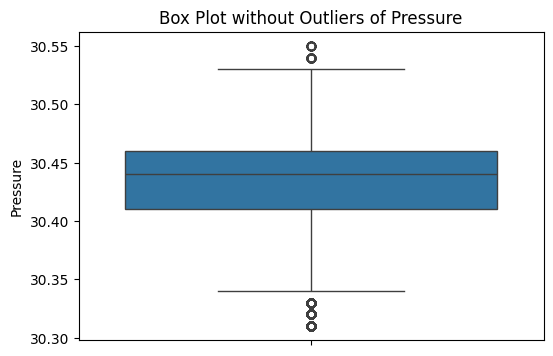

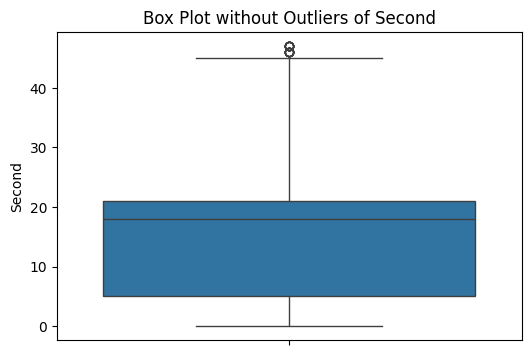

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

outlier_removal = ['Radiation', 'Temperature', 'WindDirection(Degrees)', 'Speed', 'Pressure', 'Second']

for col in outlier_removal:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Now plot boxplots for all columns after outlier removal
for col in outlier_removal:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot without Outliers of {col}')
    plt.show()

In [29]:
# checking the outliers in dataframe
def detect_Outliers(df):

    for feature in df.drop("Radiation", axis=1).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature]

        print(feature, outliers.shape[0])

detect_Outliers(df)

Temperature 0
Pressure 893
Humidity 0
WindDirection(Degrees) 134
Speed 0
Month 0
Day 0
Hour 0
Minute 0
Second 16
RiseMinute 0
SetHour 0
SetMinute 0


In [30]:
# check the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25462 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               25462 non-null  float64
 1   Temperature             25462 non-null  int64  
 2   Pressure                25462 non-null  float64
 3   Humidity                25462 non-null  int64  
 4   WindDirection(Degrees)  25462 non-null  float64
 5   Speed                   25462 non-null  float64
 6   Month                   25462 non-null  int32  
 7   Day                     25462 non-null  int32  
 8   Hour                    25462 non-null  int32  
 9   Minute                  25462 non-null  int32  
 10  Second                  25462 non-null  int32  
 11  RiseMinute              25462 non-null  int32  
 12  SetHour                 25462 non-null  int32  
 13  SetMinute               25462 non-null  int32  
dtypes: float64(4), int32(8), int64(2)
memory us

In [31]:
df.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Month  Day  Hour  Minute  Second  RiseMinute  SetHour  SetMinute  
0      9   29    23      55      26          13       18         13  
1      9   29    23      50      23          13       18         13  
2      9   29    23      45      26          13       18         13  
3      9   29    23      40      21          13       18         13  
4      9   29    23      35      24          13       18         13

### **Machine Learning Model Implementation**

### Import Relevant Libraries, Models and Functions

In [32]:
# feature scaling and dataset spliting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# models and algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Spliting of Dataset

In [33]:

# input features
x = df.drop('Radiation',axis=1)

# output feature
y = df['Radiation']

In [34]:
# splitting of original dataframe into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [35]:
# shape of the original training and testing datasets
print('Shape of input features dataset for training:',x_train.shape)
print('Shape of output feature dataset for training:',y_train.shape)
print('Shape of input features dataset for testing:',x_test.shape)
print('Shape of output feature dataset for testing:',y_test.shape)

Shape of input features dataset for training: (19096, 13)
Shape of output feature dataset for training: (19096,)
Shape of input features dataset for testing: (6366, 13)
Shape of output feature dataset for testing: (6366,)


### Feature Scaling of train and test input features

In [36]:
# Normalization
scaler = MinMaxScaler()

# X train data
x_train = scaler.fit_transform(x_train)

# X test data
x_test = scaler.transform(x_test)

### Creating Objects or Variable for all Models

### **Model Implementation**

In [37]:
# List of tuples: (model name, model object)
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('AdaBoost Regressor', AdaBoostRegressor())
]

# Loop through models, fit and evaluate
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Metrics:\n')
    print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
    print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)**0.5))
    print('R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
    print('=' * 40)


Linear Regression
Metrics:

Mean Absolute Error: 118.61
Mean Squared Error: 25280.03
Root Mean Squared Error: 159.00
R2 Score: 0.60
Decision Tree Regressor
Metrics:

Mean Absolute Error: 31.57
Mean Squared Error: 7241.09
Root Mean Squared Error: 85.09
R2 Score: 0.89
Random Forest Regressor
Metrics:

Mean Absolute Error: 24.46
Mean Squared Error: 3776.90
Root Mean Squared Error: 61.46
R2 Score: 0.94
Gradient Boosting Regressor
Metrics:

Mean Absolute Error: 45.70
Mean Squared Error: 7102.33
Root Mean Squared Error: 84.28
R2 Score: 0.89
K-Nearest Neighbors Regressor
Metrics:

Mean Absolute Error: 48.70
Mean Squared Error: 9763.54
Root Mean Squared Error: 98.81
R2 Score: 0.85
AdaBoost Regressor
Metrics:

Mean Absolute Error: 60.52
Mean Squared Error: 10397.53
Root Mean Squared Error: 101.97
R2 Score: 0.84


### **Model Evaluation**
Best Model: Random Forest Regressor and XGBoost Regressor


1. *Random Forest Regressor*

- Mean Absolute Error: 24.12
- Mean Squared Error: 3684.81
- Root Mean Squared Error: 60.70
- R2 Score: 0.94

========================================


## Regression Plot for All Models

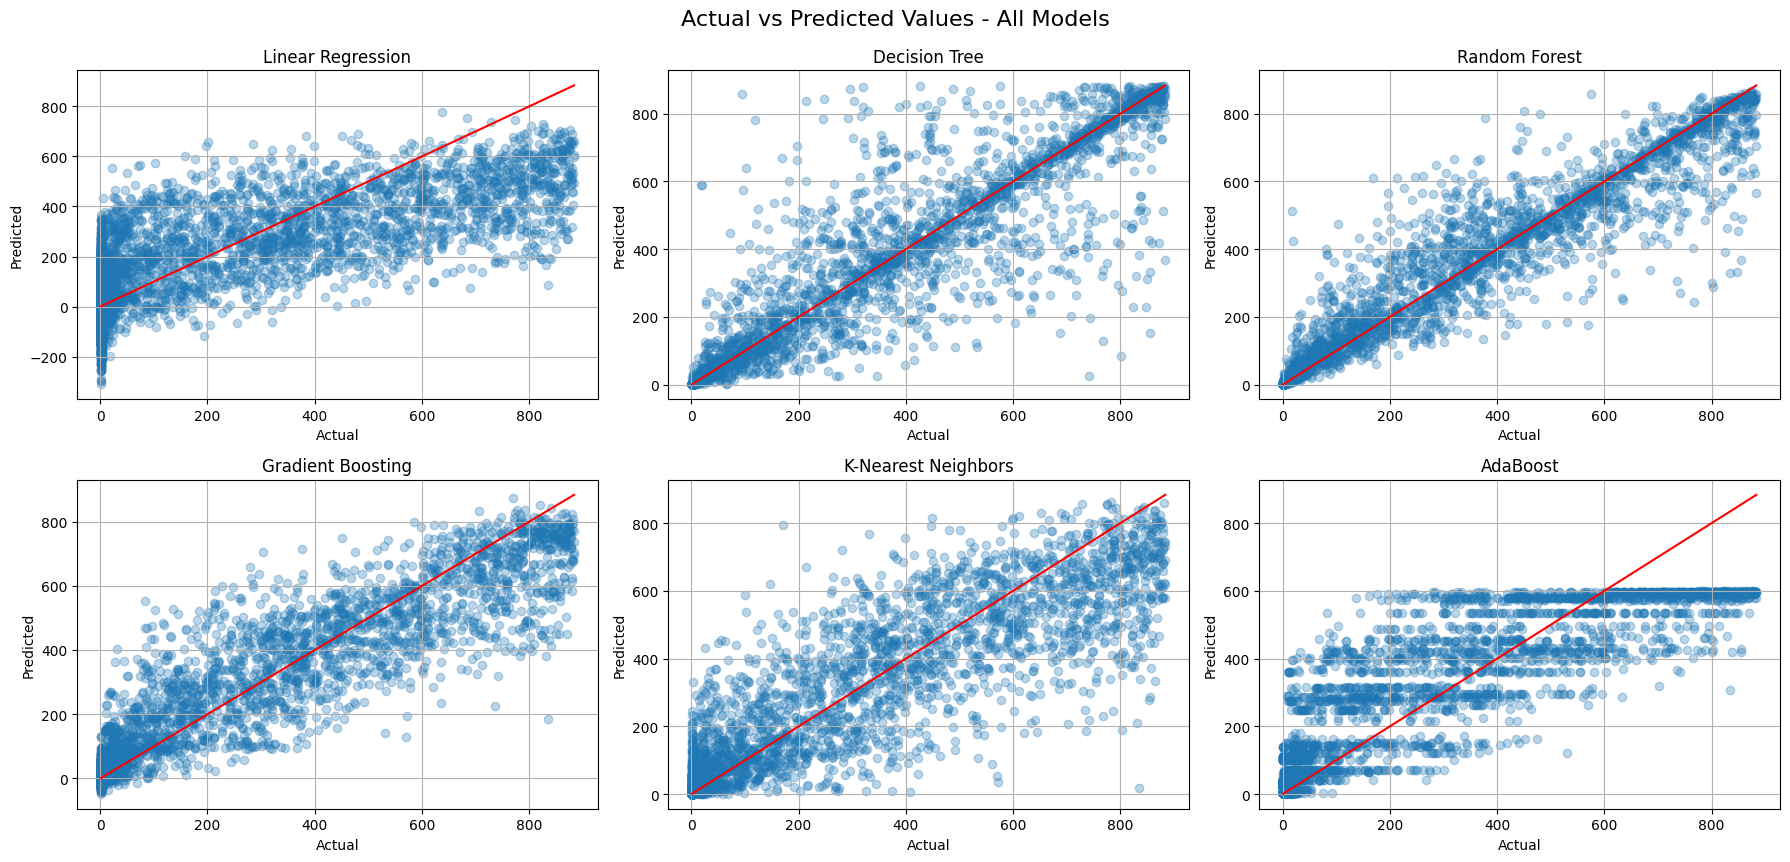

In [38]:
import matplotlib.pyplot as plt

# Assume these models are already trained on x_train and y_train
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('AdaBoost', AdaBoostRegressor())
]

# Fit and plot each model
plt.figure(figsize=(18, 12))
for idx, (name, model) in enumerate(models, 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    plt.subplot(3, 3, idx)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
    plt.title(name)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Actual vs Predicted Values - All Models', fontsize=16, y=1.02)
plt.show()


    

The Linear Regression model shows a significant spread of predicted values around the diagonal line, indicating poor performance and underfitting. It struggles to capture the underlying patterns in the data, especially non-linear relationships.

The Decision Tree Regressor performs better by capturing non-linear patterns, but it shows some inconsistency and overfitting in certain regions. While it fits the training data well, its predictions are less stable across the entire range.

The Random Forest Regressor delivers the most accurate and consistent predictions. The points are tightly clustered around the diagonal line, showing minimal variance. This suggests that the model generalizes well and handles noise effectively, making it the best-performing model in this comparison.

The Gradient Boosting Regressor also performs well, with most predictions closely aligned with the actual values. However, it exhibits slightly more variance than Random Forest, placing it as a close second in overall performance.

The K-Nearest Neighbors Regressor shows a wide spread of predicted values and high variance, indicating poor generalization. It struggles with noisy data and performs inconsistently across different value ranges.

The AdaBoost Regressor performs the worst among all models. Its predictions appear as horizontal bands, showing clear signs of underfitting and an inability to learn from the data effectively.

# Final Conclusion

In summary, the Random Forest Regressor stands out as the most reliable and accurate model, both visually and statistically, for this regression task. Gradient Boosting is also a strong performer, but Random Forest offers superior consistency and alignment with actual values.

In [39]:
# Save only Random Forest Regressor
import pickle
for name, model in models:
    if name == 'Random Forest':
        with open('solar_model.sav', 'wb') as f:
            pickle.dump(model, f)
        print(" Random Forest model saved as 'solar_model.sav'")

 Random Forest model saved as 'solar_model.sav'


In [40]:
pickle.dump(scaler,open('solar_scaler.sav', 'wb'))